In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [2]:
test = pd.read_csv("../data/processed/test-survey-data.csv")
test_predictions = pd.read_csv("../predictions/fusion_mc_preds.csv")

In [3]:
test_predictions["subjectid"] = test_predictions.id\
    .apply(lambda x: re.findall("(?<=').*(?=')", x)[0])
probs = np.array(test_predictions.iloc[:, 1:4])  # Middle three columns
y_true = np.array(test_predictions.iloc[:, -2]).reshape(-1)
y_pred = np.argmax(probs, axis=1)
test_predictions["correct"] = y_true == y_pred

In [4]:
merged_results = pd.merge(
    left=test, right=test_predictions[["subjectid", "correct"]],
    how="left", on="subjectid"
)

In [5]:
feature_plots = {
    "Age": "boxplot",
    "Height": "boxplot",
    "Sex": "heatmap",
    "Education": "heatmap",
    "Income": "heatmap",
    "OA_check": "heatmap",
    "Fall_YN": "heatmap",
    "PAtracker": "heatmap",
    "difficult_scale": "heatmap",
    "amm_3": "heatmap",
    "amm_4": "heatmap",
    "amm_5": "heatmap",
    "SEE_2": "heatmap",
    "SEE_3": "heatmap",
    "SC9": "heatmap",
    "Global01": "barplot",
    "Global03": "barplot"
}

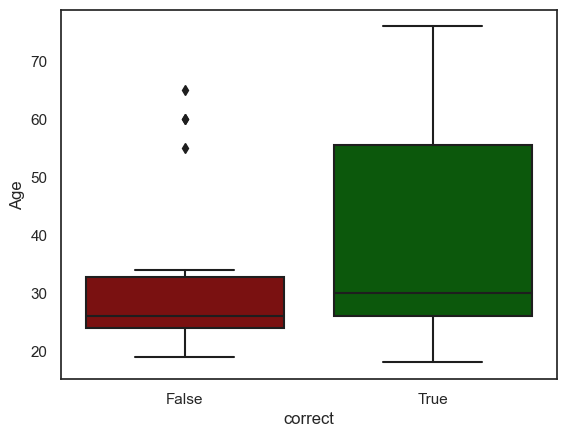

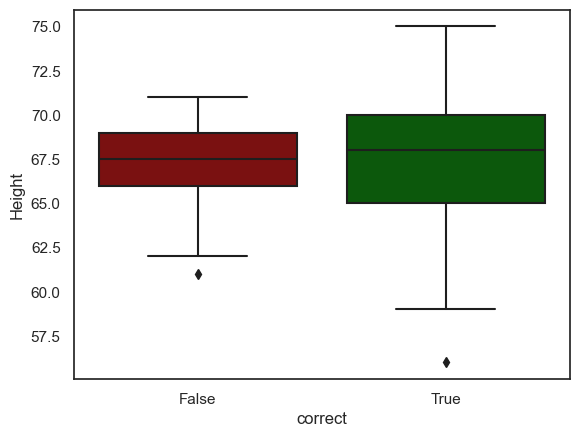

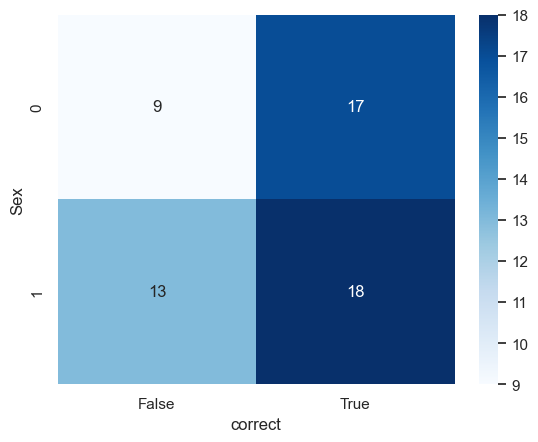

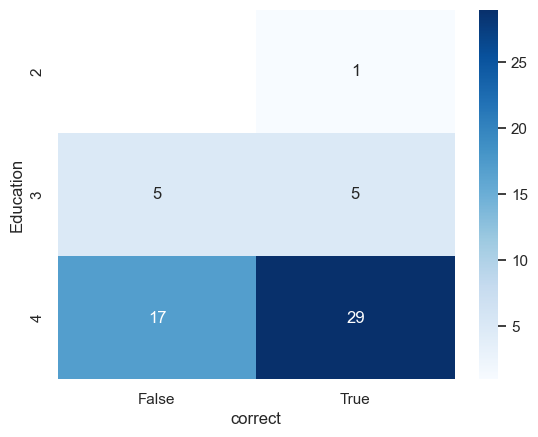

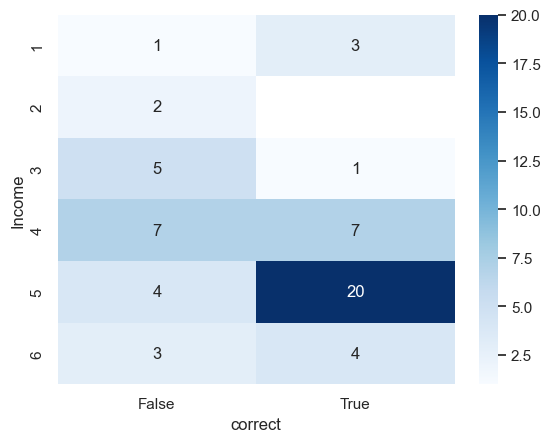

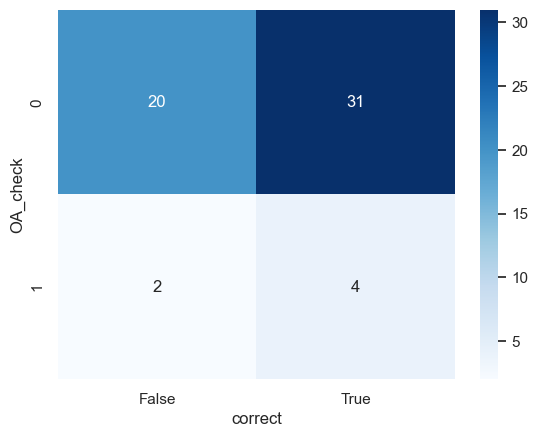

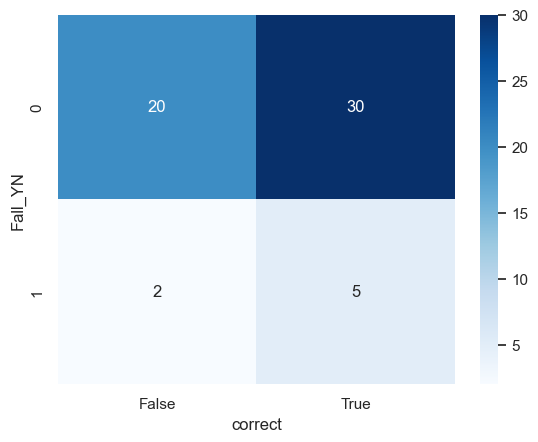

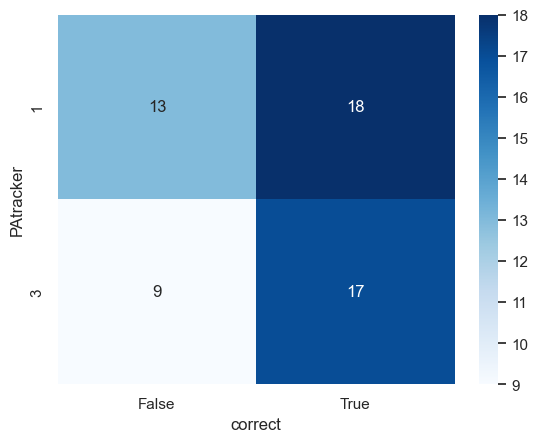

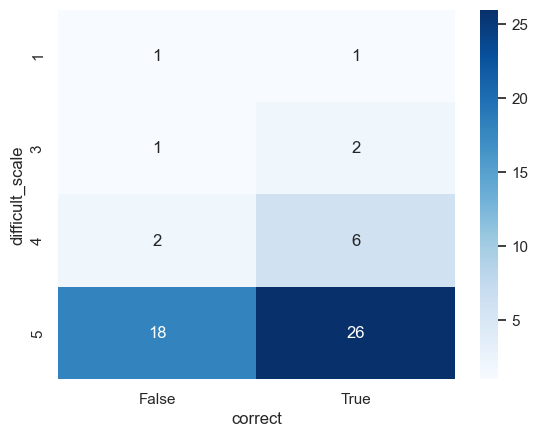

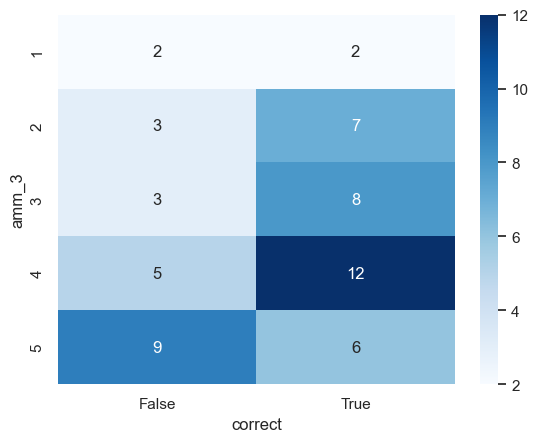

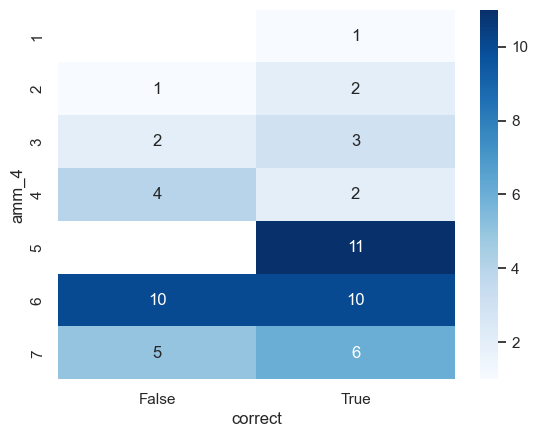

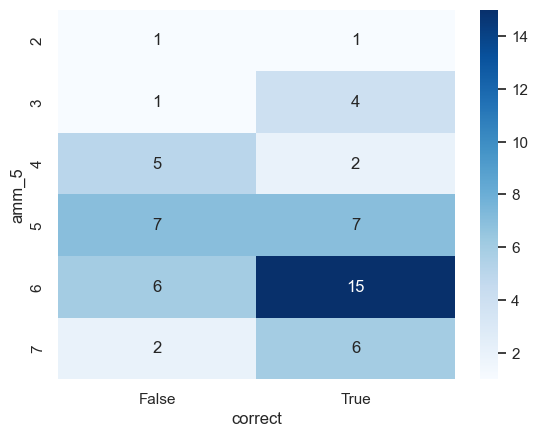

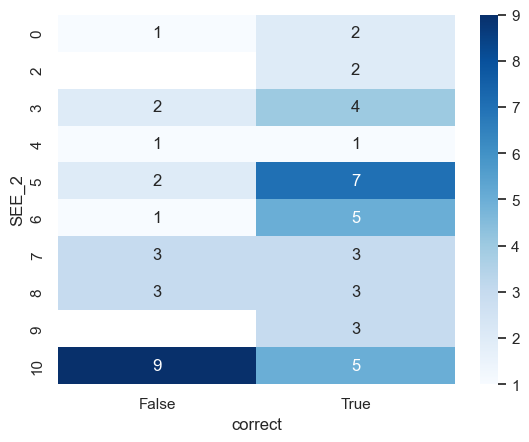

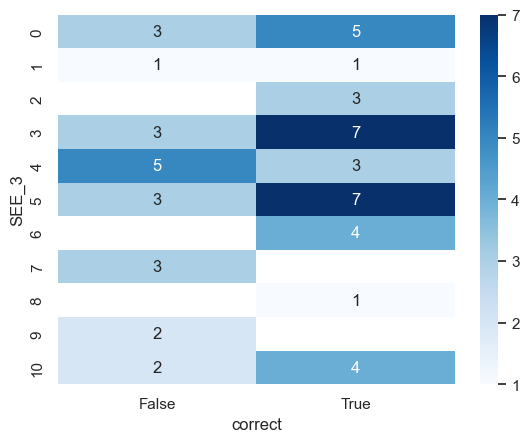

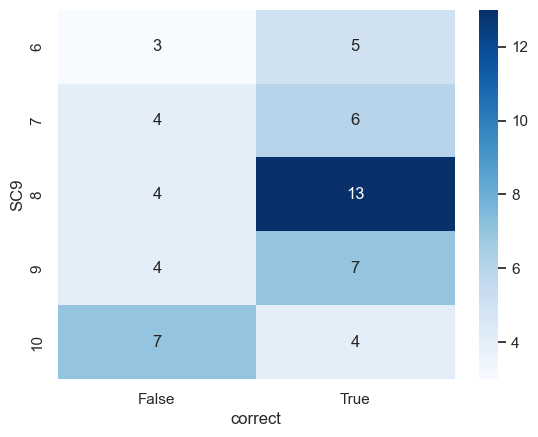

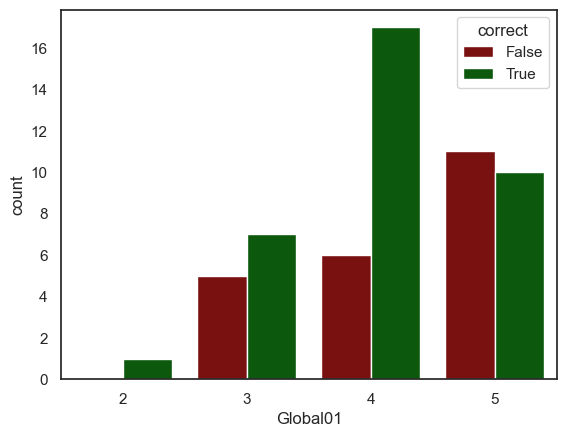

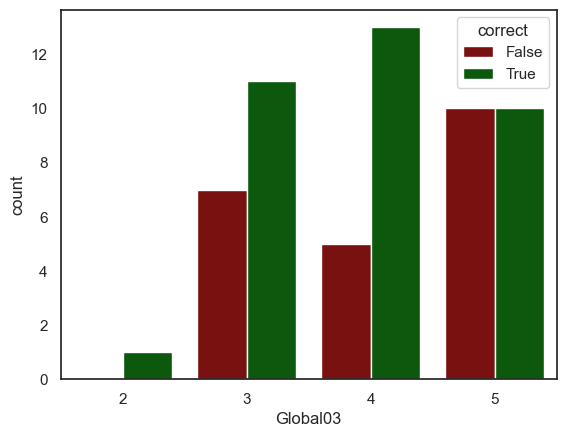

In [6]:
sns.set_theme(palette=["darkred", "darkgreen"], style="white")
for feature, plot_type in feature_plots.items():
    if plot_type == "heatmap":
        heatmap_data = merged_results.value_counts(subset=["correct", feature])\
            .reset_index()\
            .pivot_table(index=feature, columns="correct", values=0)\
            .sort_index()
        sns.heatmap(heatmap_data, cmap="Blues", annot=True)
    elif plot_type == "boxplot":
        sns.boxplot(merged_results, x="correct", y=feature)
    elif plot_type == "barplot":
        sns.countplot(merged_results, x=feature, hue="correct")
    elif plot_type == "histogram":
        sns.histplot(merged_results, x=feature, hue="correct")
    plt.show()

In [7]:
sns.set_theme(palette=sns.color_palette("deep")[2:4][::-1], style="white")
merged_results["Correctly Classified?"] = [
    "Yes" if res else "No" for res in merged_results.correct
]

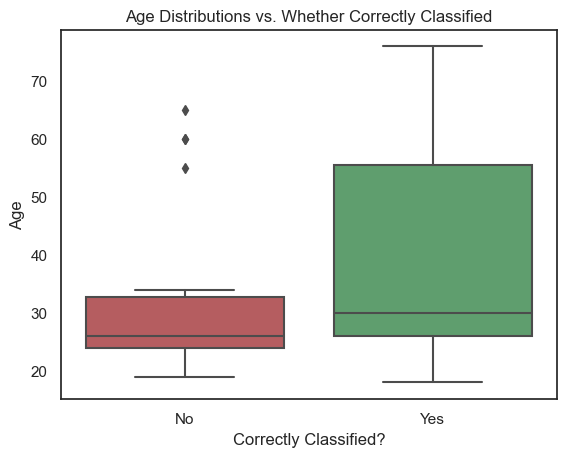

In [8]:
# Age Plot
sns.boxplot(merged_results, x="Correctly Classified?", y="Age")
plt.xlabel("Correctly Classified?")
plt.ylabel("Age")
plt.title("Age Distributions vs. Whether Correctly Classified")
plt.savefig("../visuals/age-plot.png", dpi=300, bbox_inches="tight")
plt.show()

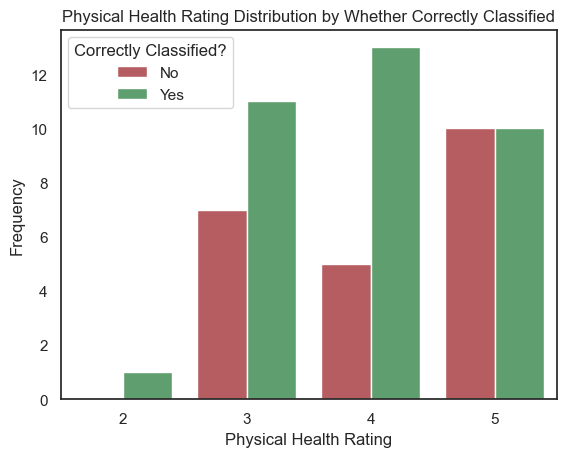

In [9]:
# Health Plot
sns.countplot(merged_results, x=feature, hue="Correctly Classified?")
plt.xlabel("Physical Health Rating")
plt.ylabel("Frequency")
plt.title("Physical Health Rating Distribution by Whether Correctly Classified")
plt.savefig("../visuals/health-plot.png", dpi=300, bbox_inches="tight")
plt.show()